<a href="https://colab.research.google.com/github/sonupp13/MY-PROJECTS-IN-MACHINE-LEARNING/blob/main/DIABETIS%20PREDICTION%20USING%20DECISION%20TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data_new=data

In [ ]:
data[['Glucose','BloodPressure','SkinThickness','Insulin'	,'BMI']]=data_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
data_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# Replacing NaN with mean values
data_new['Glucose'].fillna(data_new['Glucose'].mean(),inplace=True)
data_new['BloodPressure'].fillna(data_new['BloodPressure'].mean(),inplace=True)
data_new['BMI'].fillna(data_new['BMI'].mean(),inplace=True)
data_new['Insulin'].fillna(data_new['Insulin'].mean(),inplace=True)
data_new['SkinThickness'].fillna(data_new['SkinThickness'].mean(),inplace=True)

In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(data_new)

In [ ]:
data_scaled= pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


In [ ]:
x = data_scaled.iloc[:, [1, 4, 5, 7]].values
y = data_scaled.iloc[:, 8].values

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree

In [ ]:
model= DecisionTreeClassifier(criterion='entropy',random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred= model.predict(x_test)

NameError: name 'model' is not defined

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy*100

66.66666666666666

In [ ]:
s= confusion_matrix(y_test,y_pred)
print(s)

[[110  41]
 [ 36  44]]


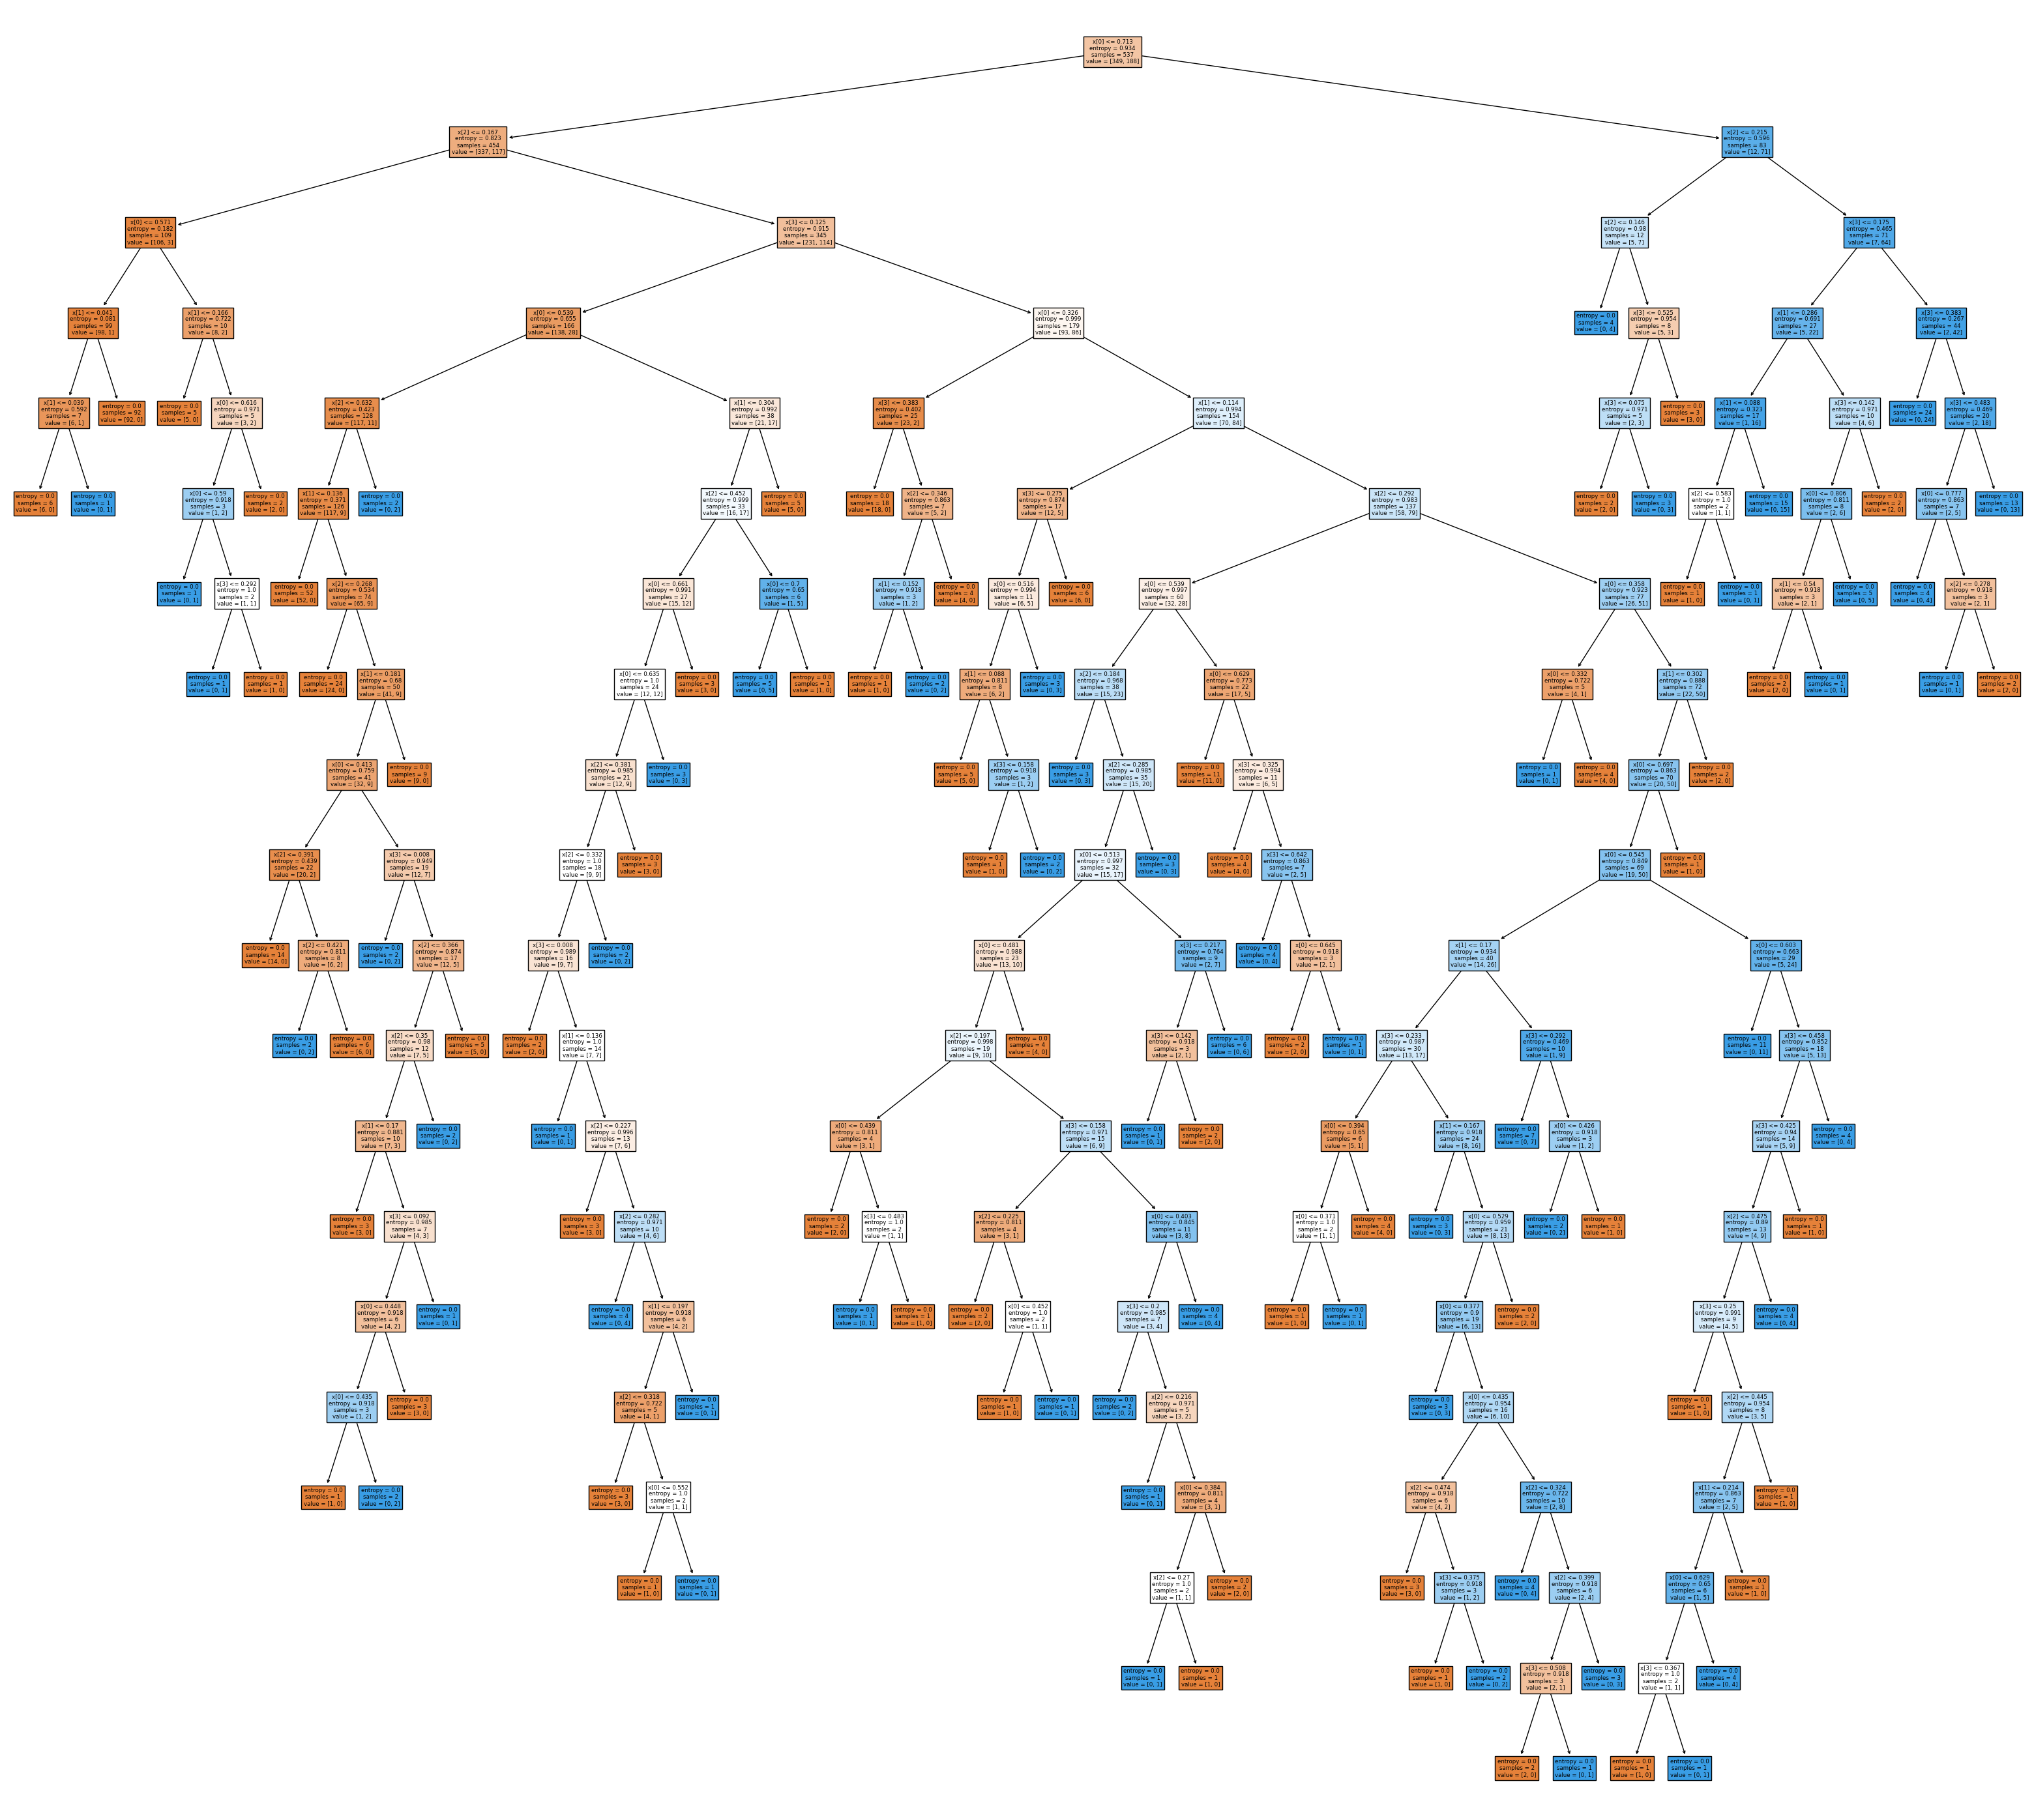

In [ ]:
plt.figure(figsize=(40,36))
plot_tree(model,filled=True)
plt.show()

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
glucose = int(input("glucose: "))
bp = int(input("bp: "))
insulin = int(input("insulin: "))
bmi= int(input("bmi: "))

user_input = [[glucose ,bp,insulin,bmi]]
predicted = model.predict(user_input)
print(predicted)


glucose: 148
bp: 72
insulin: 155
bmi: 33
[1.]
